## Modelling

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score,RepeatedStratifiedKFold,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
import timeit
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,precision_score,recall_score,RocCurveDisplay
from matplotlib import pyplot
import warnings
warnings.filterwarnings('ignore')

In [2]:
initial_df=pd.read_csv('original_data_with_encoding.csv')
x_resampled=pd.read_csv('resampled_without_encoding.csv')
x_resampled_encoding=pd.read_csv('resampled_with_encoding.csv')
y_resampled=pd.read_csv('y_resampled.csv')

### Data with Resampling and without OneHotEncoding

In [3]:
X = x_resampled.values
Y = np.squeeze(y_resampled.values)
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

scaler = StandardScaler().fit(X_train)
train_sc = scaler.transform(X_train)
test_sc = scaler.transform(X_test)

gnb = GaussianNB()
start_time = timeit.default_timer()
gnb.fit(train_sc,y_train)
elapsed = timeit.default_timer() - start_time
print("Time taken to fit the model in sec is ",elapsed)

y_pred=gnb.predict(test_sc)
print(f"Accuracy score: {accuracy_score(y_test, y_pred):.4f}")
print(f"F1 score : {f1_score(y_test, y_pred):.4f}")
print(f"Recall score : {recall_score(y_test, y_pred):.4f}")
print(f"Precision score : {precision_score(y_test, y_pred):.4f}")

Time taken to fit the model in sec is  0.7799232000000131
Accuracy score: 0.7034
F1 score : 0.7614
Recall score : 0.9441
Precision score : 0.6380


In [4]:
gnb.get_params()

{'priors': None, 'var_smoothing': 1e-09}

<AxesSubplot:>

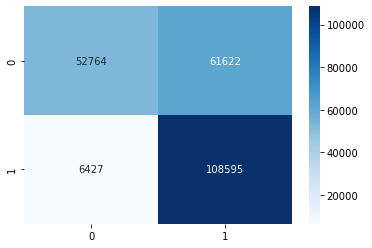

In [5]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True, fmt='', cmap='Blues')

In [6]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.46      0.61    114386
           1       0.64      0.94      0.76    115022

    accuracy                           0.70    229408
   macro avg       0.76      0.70      0.68    229408
weighted avg       0.76      0.70      0.68    229408



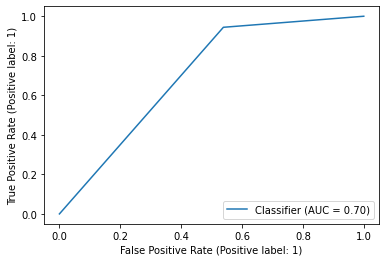

In [7]:
RocCurveDisplay.from_predictions(y_test, y_pred)

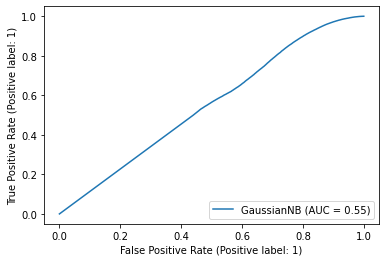

In [9]:
RocCurveDisplay.from_estimator(gnb, X_test, y_test)

### Checking on training dataset

In [10]:
y_pred=gnb.predict(train_sc)
print(f"Accuracy score: {accuracy_score(y_train, y_pred):.4f}")
print(f"F1 score : {f1_score(y_train, y_pred):.4f}")
print(f"Recall score : {recall_score(y_train, y_pred):.4f}")
print(f"Precision score : {precision_score(y_train, y_pred):.4f}")

Accuracy score: 0.7028
F1 score : 0.7605
Recall score : 0.9441
Precision score : 0.6366


In [12]:
gnb.get_params()

{'priors': None, 'var_smoothing': 1e-09}

### Data with Resampling and with OneHotEncoding

In [13]:
X = x_resampled_encoding.values
Y = np.squeeze(y_resampled.values)
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

scaler = StandardScaler().fit(X_train)
train_sc = scaler.transform(X_train)
test_sc = scaler.transform(X_test)

gnb = GaussianNB()
start_time = timeit.default_timer()
gnb.fit(train_sc,y_train)
elapsed = timeit.default_timer() - start_time
print("Time taken to fit the model in sec is ",elapsed)

y_pred1=gnb.predict(test_sc)
print(f"Accuracy score: {accuracy_score(y_test, y_pred1):.4f}")
print(f"F1 score : {f1_score(y_test, y_pred1):.4f}")
print(f"Recall score : {recall_score(y_test, y_pred1):.4f}")
print(f"Precision score : {precision_score(y_test, y_pred1):.4f}")

Time taken to fit the model in sec is  4.751618899999983
Accuracy score: 0.7184
F1 score : 0.7344
Recall score : 0.7766
Precision score : 0.6967


<AxesSubplot:>

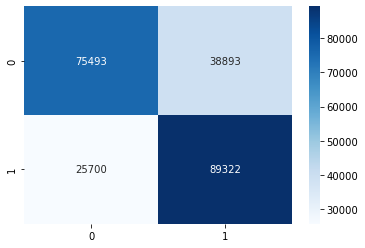

In [14]:
sns.heatmap(confusion_matrix(y_test,y_pred1),annot=True, fmt='', cmap='Blues')

In [15]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.75      0.66      0.70    114386
           1       0.70      0.78      0.73    115022

    accuracy                           0.72    229408
   macro avg       0.72      0.72      0.72    229408
weighted avg       0.72      0.72      0.72    229408



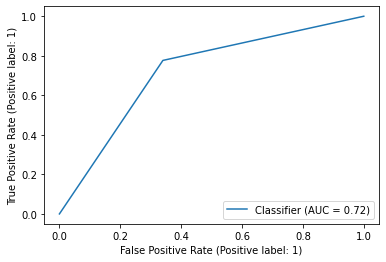

In [16]:
RocCurveDisplay.from_predictions(y_test, y_pred1)

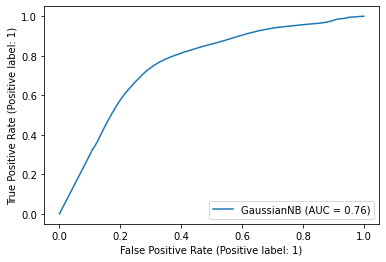

In [17]:
RocCurveDisplay.from_estimator(gnb, test_sc, y_test)

### Checking accuracy on training dataset

In [18]:
y_pred1=gnb.predict(train_sc)
print(f"Accuracy score: {accuracy_score(y_train, y_pred1):.4f}")
print(f"F1 score : {f1_score(y_train, y_pred1):.4f}")
print(f"Recall score : {recall_score(y_train, y_pred1):.4f}")
print(f"Precision score : {precision_score(y_train, y_pred1):.4f}")

Accuracy score: 0.7177
F1 score : 0.7334
Recall score : 0.7770
Precision score : 0.6943


### One Hot Encoding improved accuracy

### Performing Cross Validation

In [20]:
gnb = GaussianNB()

start_time = timeit.default_timer()
gnb.fit(train_sc,y_train)
elapsed = timeit.default_timer() - start_time
print("Time taken to fit the model in sec is ",elapsed)

start_time = timeit.default_timer()
#perform k fold
cv_r2_scores_rf = cross_val_score(gnb, X, Y, cv=10,scoring='r2')
elapsed = timeit.default_timer() - start_time
print("Time taken to perform cv for the model in sec is ",elapsed)

print("Cv2 scores:",cv_r2_scores_rf)
print("Mean 5-Fold R Squared: {}".format(np.mean(cv_r2_scores_rf)))

Time taken to fit the model in sec is  2.119203499999969
Time taken to perform cv for the model in sec is  33.42306769999999
Cv2 scores: [-0.49905845 -0.10325708 -0.10643046 -0.11033617 -0.09746827 -0.09753801
 -0.09430442 -0.09357209 -0.09691987 -0.09486238]
Mean 5-Fold R Squared: -0.1393747207568647
